In [1]:
! pip install twstock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 8.2 MB/s 


# Download font

In [2]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')

--2022-07-03 08:54:27--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.100, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cotbs0oi3almaopbq35b8eeh2itchtr4/1656838425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=82e0c048-cc5c-4b4b-af3e-12028210cb5b [following]
--2022-07-03 08:54:27--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cotbs0oi3almaopbq35b8eeh2itchtr4/1656838425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=82e0c048-cc5c-4b4b-af3e-12028210cb5b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0k-9o-d

# Download stock CSV

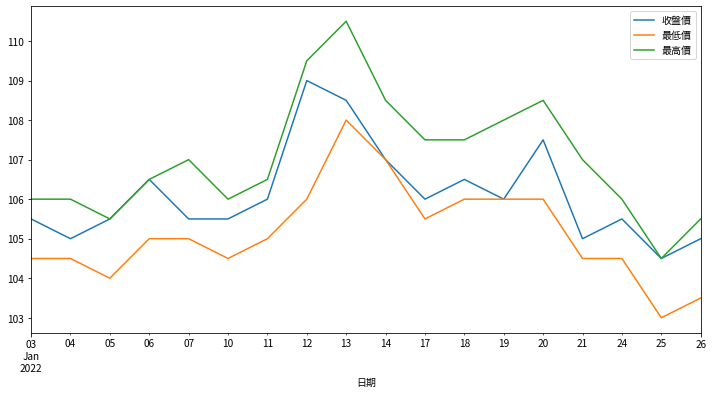

In [ ]:
import csv
import pandas as pd
import twstock
import os
import matplotlib.pyplot as plt
import matplotlib

# set graph's font
matplotlib.rc('font', family='Taipei Sans TC Beta')
# display negative normally
plt.rcParams["axes.unicode_minus"] = False

# if file doesn't exist, create file
filepath = "stock.csv"
if not os.path.isfile(filepath):
  # get the stock through the stock's code and get January, 2022's information
  stock = twstock.Stock("1301")
  stocklist = stock.fetch(2022, 1)

  # create columns
  title = ["日期", "成交股數", "成交金額", "開盤價", "最高價", "最低價", "收盤價", "漲跌價差", "成交筆數"]
  data = []
  for stock in stocklist:
    # convert datetime object into string
    strdate = stock.date.strftime("%Y-%m-%d")
    li = [strdate, stock.capacity, stock.turnover, stock.open, stock.high, stock.low, stock.close, stock.change, stock.transaction]
    data.append(li)

    # create the csv file
    outputfile = open(filepath, "w", newline = "", encoding = "big5")
    outputwriter = csv.writer(outputfile)
    outputwriter.writerow(title)
    for dataline in data:
      outputwriter.writerow(dataline)
    outputfile.close()

# load csv file and display
pdstock = pd.read_csv(filepath, encoding = "big5")
pdstock["日期"] = pd.to_datetime(pdstock["日期"])
pdstock.plot(kind = "line", figsize = (12, 6), x = "日期", y = ["收盤價", "最低價", "最高價"])

In [ ]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Display graph through plotly

In [ ]:
import pandas as pd
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot
import matplotlib
import matplotlib.pyplot as plt

# set graph's font
matplotlib.rc('font', family='Taipei Sans TC Beta')
# display negative normally
plt.rcParams["axes.unicode_minus"] = False

# if file doesn't exist, create file
filepath = "stock.csv"

# load csv file and display
pdstock = pd.read_csv("stock.csv", encoding = "big5")
data = [
  Scatter(x = pdstock["日期"], y = pdstock["收盤價"], name = "收盤價"),
  Scatter(x = pdstock["日期"], y = pdstock["最低價"], name = "最低價"),
  Scatter(x = pdstock["日期"], y = pdstock["最高價"], name = "最高價"),
]
plot({"data": data, "layout": Layout(title = "2022年1月台塑股票統計圖")}, auto_open = True)

'temp-plot.html'

# Download January, February 2021 stock information

In [ ]:
import csv
import twstock
import os

# if file doesn't exist, create file
filepath = "stock2021.csv"
if not os.path.isfile(filepath):
  # create columns
  title = ["日期", "成交股數", "成交金額", "開盤價", "最高價", "最低價", "收盤價", "漲跌價差", "成交筆數"]
  data = []

  for i in range(1, 3):
    # get the stock through the stock's code
    stock = twstock.Stock("1301")
    stocklist = stock.fetch(2021, i)

    for stock in stocklist:
      # convert datetime object into string
      strdate = stock.date.strftime("%Y-%m-%d")
      li = [strdate, stock.capacity, stock.turnover, stock.open, stock.high, stock.low, stock.close, stock.change, stock.transaction]
      data.append(li)

  # create the csv file
  outputfile = open(filepath, "w", newline = "", encoding = "big5")
  outputwriter = csv.writer(outputfile)

  # output file
  outputwriter.writerow(title)
  for dataline in (data):
    outputwriter.writerow(dataline)
  outputfile.close()

# Dowload two month's stock information every single time to keep from locking IP

In [4]:
import csv
import twstock
import os

# if file doesn't exist, create file
filepath = "stock2021.csv"
if os.path.isfile(filepath):
  # create columns
  data = []
  for i in range(11, 13):   # change the upper limit and lower limit every time
    # get the stock through the stock's code
    stock = twstock.Stock("1301")
    stocklist = stock.fetch(2021, i)

    for stock in stocklist:
      # convert datetime object into string
      strdate = stock.date.strftime("%Y-%m-%d")
      li = [strdate, stock.capacity, stock.turnover, stock.open, stock.high, stock.low, stock.close, stock.change, stock.transaction]
      data.append(li)

  # create the csv file
  outputfile = open(filepath, "a", newline = "", encoding = "big5")
  outputwriter = csv.writer(outputfile)
  
  # add title when first add information
  for dataline in (data):
    outputwriter.writerow(dataline)
  outputfile.close()

# Unzip csv file

In [5]:
! unzip /content/drive/MyDrive/ML/stock2021.zip

Archive:  /content/drive/MyDrive/ML/stock2021.zip
  inflating: stock2021.csv           


# Predict through RNN

data_all's shape:  (244, 3)
datap_all's shape:  (244, 1)
train_x's shape:  (187, 10, 3) , train_y's shape:  (187, 1)
test_x's shape:  (47, 10, 3) , test_y.shape:  (47, 1)
Epoch 1/300
2/2 [==============================] - 3s 760ms/step - loss: 0.1752 - accuracy: 0.0060 - val_loss: 0.1027 - val_accuracy: 0.1579
Epoch 2/300
2/2 [==============================] - 0s 92ms/step - loss: 0.0229 - accuracy: 0.0060 - val_loss: 0.0912 - val_accuracy: 0.1579
Epoch 3/300
2/2 [==============================] - 0s 84ms/step - loss: 0.0474 - accuracy: 0.0060 - val_loss: 0.0613 - val_accuracy: 0.1579
Epoch 4/300
2/2 [==============================] - 0s 107ms/step - loss: 0.0259 - accuracy: 0.0060 - val_loss: 0.0175 - val_accuracy: 0.1579
Epoch 5/300
2/2 [==============================] - 0s 87ms/step - loss: 0.0122 - accuracy: 0.0060 - val_loss: 0.0527 - val_accuracy: 0.1579
Epoch 6/300
2/2 [==============================] - 0s 86ms/step - loss: 0.0185 - accuracy: 0.0060 - val_loss: 0.0781 - val_accu

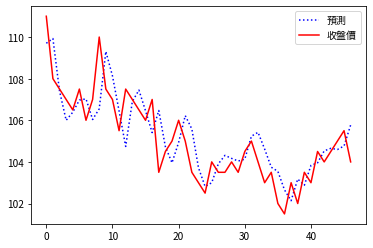

'temp-plot.html'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import LSTM, Dense
from plotly.graph_objs import Scatter, Layout
from plotly.offline import plot
import matplotlib

# set graph's font
matplotlib.rc('font', family='Taipei Sans TC Beta')
# display negative normally
plt.rcParams["axes.unicode_minus"] = False


def load_data(df, dfp, sequence_length = 10, split = 0.8):
  # convert features from dataframe to float
  data_all = np.array(df).astype(float)
  print("data_all's shape: ", data_all.shape)
  # scale features betweem 0 and 1
  data_all = scaler.fit_transform(data_all)

  # convert labels from dataframe to float
  datap_all = np.array(dfp).astype(float)
  print("datap_all's shape: ", datap_all.shape)
  # scale labels between 0 and 1
  datap_all = scalert.fit_transform(datap_all)

  # split every sequence_length's days into a sector, label is the day after the sector
  data = []
  datap = []
  for i in range(len(data_all) - sequence_length):
    data.append(data_all[i: i + sequence_length])
    datap.append(datap_all[i + sequence_length])

  # convert features and labels from list into float matrix
  x = np.array(data).astype("float64")
  y = np.array(datap).astype("float64")

  # split training set and testing set
  split_boundary = int(x.shape[0] * split)
  train_x = x[:split_boundary]
  test_x = x[split_boundary:]

  train_y = y[:split_boundary]
  test_y = y[split_boundary:]

  return train_x, train_y, test_x, test_y

def build_model():
  # create a model
  model = Sequential()
  # add LSTM layer
  model.add(LSTM(input_shape = (10, 3), units = 256, unroll = False))
  # add putput layer
  model.add(Dense(units = 1))
  # set the training mode
  model.compile(loss = "mse", optimizer = "adam", metrics = ["accuracy"])
  return model

def train_model(train_x, train_y, test_x, test_y):
  try:
    # start training model
    model.fit(train_x, train_y, batch_size = 100, epochs = 300, validation_split = 0.1)
    # do prediction on test set
    predict = model.predict(test_x)
    # convert to one-dimension matrix
    predict = np.reshape(predict, (predict.size, ))
  except KeyboardInterrupt:
    print(predict)
    print(test_y)
  return predict

# cancel displaying pandas infroamtion reset alarm
pd.options.mode.chained_assignment = None
filename = "stock2021.csv"
# load csv file
df = pd.read_csv(filename, encoding = "big5")
ddtrain = df[["收盤價", "最高價", "最低價"]]
ddprice = df[["收盤價"]]

# preprocess data before training
scaler = MinMaxScaler()
scalert = MinMaxScaler()
train_x, train_y, test_x, test_y = load_data(ddtrain, ddprice, sequence_length = 10, split = 0.8)
print("train_x's shape: ", train_x.shape, ", train_y's shape: ", train_y.shape)
print("test_x's shape: ", test_x.shape, ", test_y.shape: ", test_y.shape)

# create model and training
model = build_model()
predict_y = train_model(train_x, train_y, test_x, test_y)
predict_y = scalert.inverse_transform([[i] for i in predict_y])
test_y = scalert.inverse_transform(test_y)

# display the reasult with matplotlib.pyplot
plt.plot(predict_y, "b:")
plt.plot(test_y, "r-")
plt.legend(["預測", "收盤價"])
plt.show()

# preprocess plotly's information
dd2 = pd.DataFrame({"predict": list(predict_y), "label": list(test_y)})
dd2["predict"] = np.array(dd2["predict"]).astype("float64")
dd2["label"] = np.array(dd2["label"]).astype("float64")

# display the result with plotly
data = [
  Scatter(y = dd2["predict"], name = "預測", line = dict(color = "blue", dash = "dot")),
  Scatter(y = dd2["label"], name = "收盤價", line = dict(color = "red"))
]
plot({"data": data, "layout": Layout(title = "2021年台塑股票統計圖")}, auto_open = True)